<a href="https://colab.research.google.com/github/arnautoleg/Druc_Alina/blob/main/Tudor_Elena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

In [21]:
df=pd.read_excel('/content/genotipare focare 15.03.2024 Pro.xlsx')

In [22]:
df.columns

Index(['Virsta', 'Genul', 'Grad rudenie', 'Grad de rudenie', 'Tip pacient',
       'Index_co_secundar', 'Index_secundar_perioada', 'Index_co_perioada',
       'Cod Diagnostic ', 'Rezultat tratament', 'E_H', 'E_R', 'E_E', 'E_S',
       'Genotip'],
      dtype='object')

In [23]:
df.drop(['Grad rudenie', 'Grad de rudenie'], axis=1, inplace=True)
df.columns


Index(['Virsta', 'Genul', 'Tip pacient', 'Index_co_secundar',
       'Index_secundar_perioada', 'Index_co_perioada', 'Cod Diagnostic ',
       'Rezultat tratament', 'E_H', 'E_R', 'E_E', 'E_S', 'Genotip'],
      dtype='object')

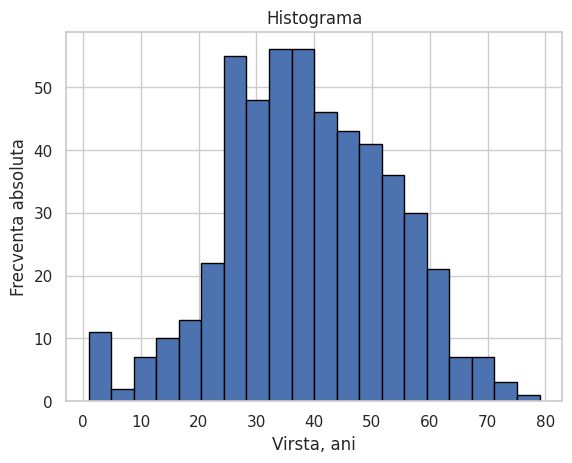

In [24]:
import matplotlib.pyplot as plt

# Crear el histograma
plt.hist(df.Virsta, bins=20, edgecolor='black')


plt.title('Histograma')
plt.xlabel('Virsta, ani')
plt.ylabel('Frecventa absoluta')


plt.show()

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

def bar_plot_cat (el, df):

  # Calculate percentage for each category
  percentage_data = (df[el].value_counts(normalize=True, sort=False).sort_index() * 100).reset_index()
  percentage_data.columns = [el, 'Procente']

  # Calculate confidence intervals for each category
  ci_data = df[el].value_counts().apply(lambda x: proportion_confint(x, len(df), method='normal')).reset_index()
  ci_data.columns = [el, 'CI']

  # Unpack the tuple into separate columns for lower and upper bounds
  ci_data[['CI_Lower', 'CI_Upper']] = pd.DataFrame(ci_data['CI'].tolist(), index=ci_data.index)

  # Drop the original CI column
  ci_data = ci_data.drop(columns=['CI'])

  # Merge percentage and CI data
  merged_data = pd.merge(percentage_data, ci_data, on=el)

  # Create bar plot using seaborn
  plt.figure(figsize=(8, 6))
  sns.set(style="whitegrid")
  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")

  # Set y-axis range to be from 0 to 100
  ax.set_ylim(0, 100)


  # Add percentage and 95% confidence intervals as text annotations
  for i, row in merged_data.iterrows():
     percentage = row['Procente']
     lower_ci = row['CI_Lower'] * 100
     upper_ci = row['CI_Upper'] * 100
     if len(df[el].value_counts().index) <= 3:
      plt.text(i, percentage, f'{percentage:.1f}% [{lower_ci:.1f}, {upper_ci:.1f}]', ha='center', va='bottom', color='black')
     else:
      plt.text(i, percentage, f'{percentage:.1f}%\n [{lower_ci:.1f}, {upper_ci:.1f}]', ha='center', va='bottom', color='black')
  plt.title('Bar Plot Frecventele relative cu 95% IC')
  plt.show()
#“normal”, “agresti_coull”, “beta”, “wilson”, “binom_test”

<ipython-input-25-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


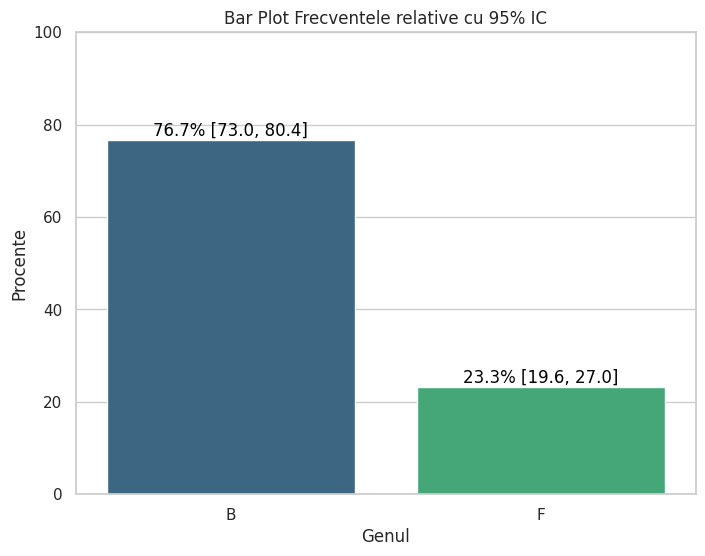

<ipython-input-25-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


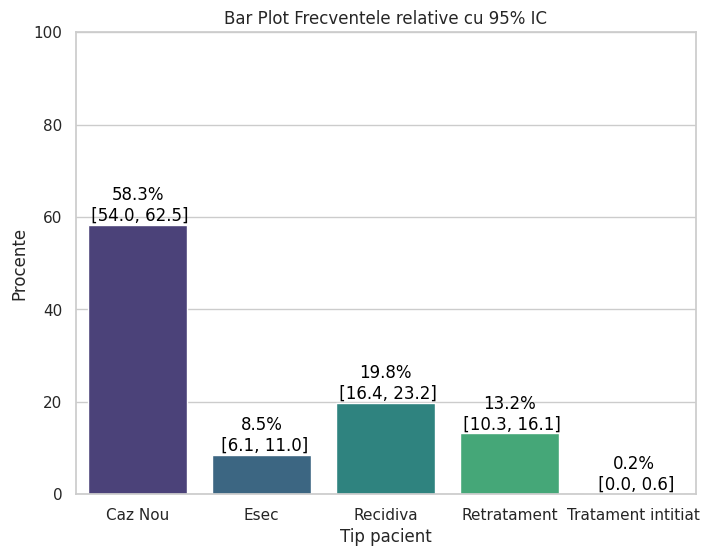

<ipython-input-25-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


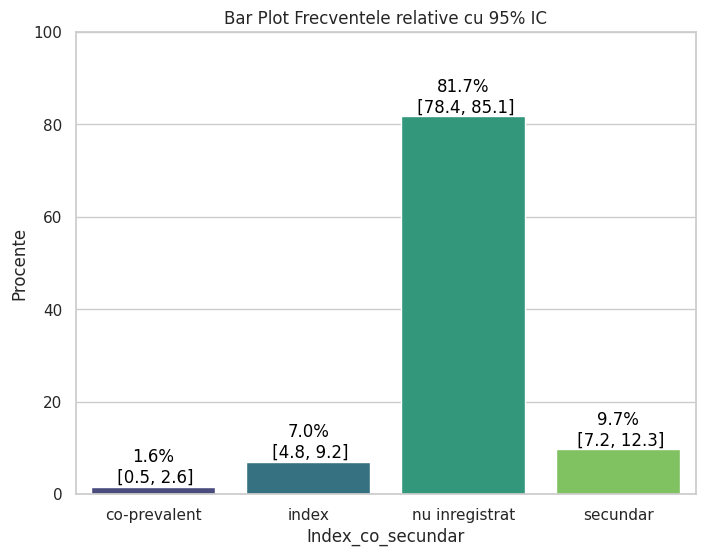

<ipython-input-25-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


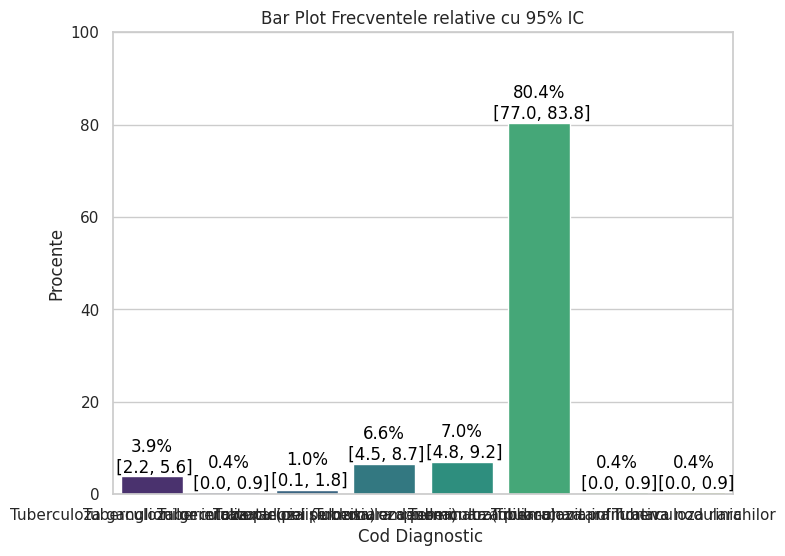

<ipython-input-25-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


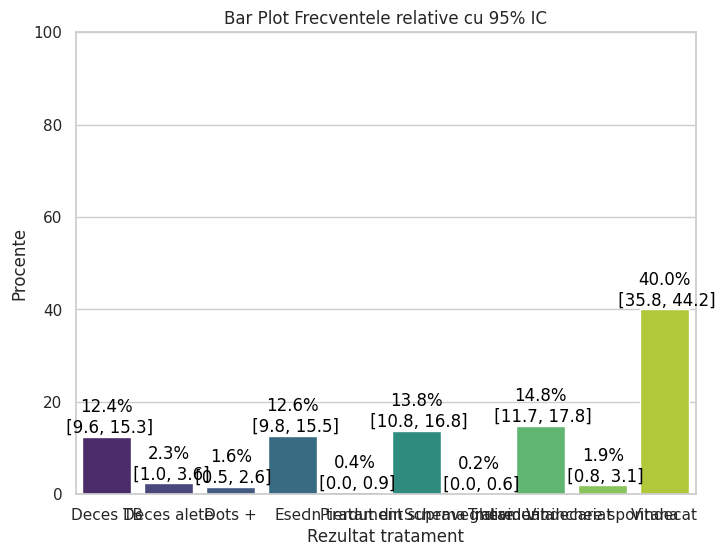

TypeError: '<' not supported between instances of 'int' and 'str'

In [26]:
for el in ['Genul', 'Tip pacient',
           'Index_co_secundar',
           'Cod Diagnostic ', 'Rezultat tratament', 'E_H', 'E_R', 'E_E', 'E_S',
           'Genotip']:
  bar_plot_cat (el, df)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Virsta                   515 non-null    float64
 1   Genul                    515 non-null    object 
 2   Tip pacient              515 non-null    object 
 3   Index_co_secundar        515 non-null    object 
 4   Index_secundar_perioada  515 non-null    object 
 5   Index_co_perioada        515 non-null    object 
 6   Cod Diagnostic           515 non-null    object 
 7   Rezultat tratament       515 non-null    object 
 8   E_H                      515 non-null    object 
 9   E_R                      515 non-null    object 
 10  E_E                      515 non-null    object 
 11  E_S                      515 non-null    object 
 12  Genotip                  515 non-null    object 
dtypes: float64(1), object(12)
memory usage: 52.4+ KB
